## Scrape the dataset form UCI

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.features 
y = cirrhosis_patient_survival_prediction.data.targets 
  
# metadata 
print(cirrhosis_patient_survival_prediction.metadata) 
  
# variable information 
print(cirrhosis_patient_survival_prediction.variables) 


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'title': 'Prognos

Save the data as csv

In [4]:
X.to_csv('cirrhosis_patient_survival_prediction.csv', index=False)
y.to_csv('cirrhosis_patient_survival_prediction_target.csv', index=False)

In [10]:
features = pd.read_csv('Data/uncleaned/cirrhosis_patient_survival_prediction.csv')
target = pd.read_csv('Data/uncleaned/cirrhosis_patient_survival_prediction_target.csv')
data = pd.concat([features, target], axis=1)
data.to_csv('Data/cleaned_data.csv', index=False)

## Data Preparation

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Data/cleaned_data.csv')
data.head()

Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage Status  
0         12.2    4.0      D  
1         10.6    3.0      C  
2         12.0    4.0      D  
3         10.3    4.0      D  
4         10.9    3.0     CL

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

There are couple of numeric and categorical data

In [52]:
columns = data.columns
for col in columns:
    print(f'{col} : {data[col].unique()}')

Drug : ['D-penicillamine' 'Placebo' 'NaNN' nan]
Age : [21464 20617 25594 19994 13918 24201 20284 19379 15526 25772 19619 21600
 16688 20535 23612 14772 19060 19698 18102 21898 23445 20555 20442 16261
 16463 19002 19884 16417 23331 15116 15177 19722 18731 19015 17758 20604
 22546 13378 20232 17046 12285 12307 17850 13727 15265 16728 17323 17947
 22336 19544 19025 18460 24621 14317 24020 12279 19567 16279 14754 21324
 16034 22173 17031 22977 14684 16967 18733 11912 18021 20600 17841 11868
 14060 18964 15895 18972 18199 17512 16990 24622 23107 24585 20459 20392
 17246 19270 13616 15119 19155 12227 16658 28018 13344 19693 16944 26259
 10550 17703 18799 16418 20662 17884 15712 12433 25023 22836 18393 16094
 14212 15031 20256 18713 19295 15574 22306 18137 17844 19817 12839 24803
 20248 16736 19318 17233 19577 16109 15322 23235 16154 22646 14812 22881
 15463 15694 20440 22960 18719 17080 19751 17180 20354 16839 19098 18701
 12369 27398 11273 22574 12779 20104 25546 18118 25340 15909 21699 178

Missing values

In [53]:
for col in columns:
    missing = data[col].isnull().sum()
    print(f'{col} : {missing}')

Drug : 105
Age : 0
Sex : 0
Ascites : 105
Hepatomegaly : 105
Spiders : 105
Edema : 0
Bilirubin : 0
Cholesterol : 106
Albumin : 0
Copper : 106
Alk_Phos : 106
SGOT : 106
Tryglicerides : 106
Platelets : 7
Prothrombin : 2
Stage : 6
Status : 0


Quarter of the data is missing for few fields need to check its dtype

In [54]:
for col in columns:
    missing = data[col].isnull().sum()
    type = data[col].dtype
    if missing > 0:
        print(f'{col} : {missing} missing values, dtype is {type}')

Drug : 105 missing values, dtype is object
Ascites : 105 missing values, dtype is object
Hepatomegaly : 105 missing values, dtype is object
Spiders : 105 missing values, dtype is object
Cholesterol : 106 missing values, dtype is object
Copper : 106 missing values, dtype is object
Alk_Phos : 106 missing values, dtype is float64
SGOT : 106 missing values, dtype is float64
Tryglicerides : 106 missing values, dtype is object
Platelets : 7 missing values, dtype is object
Prothrombin : 2 missing values, dtype is float64
Stage : 6 missing values, dtype is float64


Drop missing values

In [56]:
data.replace('NaN', pd.NA, inplace=True)

# Drop rows with missing values
df_clean = data.dropna()


In [59]:
df_clean.to_csv('Data/cleaned_data.csv', index=False)

In [60]:
df_clean

Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0    D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1    D-penicillamine  20617   F       N            Y       Y     N        1.1   
2    D-penicillamine  25594   M       N            N       N     S        1.4   
3    D-penicillamine  19994   F       N            Y       Y     S        1.8   
4            Placebo  13918   F       N            Y       Y     N        3.4   
..               ...    ...  ..     ...          ...     ...   ...        ...   
307  D-penicillamine  22347   F       N            Y       N     N        0.4   
308          Placebo  21294   F       N            N       N     N        0.4   
309  D-penicillamine  22767   F       N            N       N     N        1.7   
310  D-penicillamine  13879   F       N            N       N     N        2.0   
311          Placebo  12109   F       N            N       Y     N        6.4   

    Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0           261     2.60    156    1718.0  137.95           172       190   
1           302     4.14     54    7394.8  113.52            88       221   
2           176     3.48    210     516.0   96.10            55       151   
3           244     2.54     64    6121.8   60.63            92       183   
4           279     3.53    143     671.0  113.15            72       136   
..          ...      ...    ...       ...     ...           ...       ...   
307         246     3.58     24     797.0   91.00           113       288   
308         260     2.75     41    1166.0   70.00            82       231   
309         434     3.35     39    1713.0  171.00           100       234   
310         247     3.16     69    1050.0  117.00            88       335   
311         576     3.79    186    2115.0  136.00           149       200   

     Prothrombin  Stage Status  
0           12.2    4.0      D  
1           10.6    3.0      C  
2           12.0    4.0      D  
3           10.3    4.0      D  
4           10.9    3.0     CL  
..           ...    ...    ...  
307         10.4    2.0      C  
308         10.8    2.0      C  
309         10.2    2.0      C  
310         10.5    2.0      C  
311         10.8    2.0      C  

[312 rows x 18 columns]

Pre process data

In [66]:
age=df_clean['Age']
age_in_years = age/365
df_clean['Age_in_years'] = age_in_years

/var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/ipykernel_15602/3645587567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_in_years'] = age_in_years


In [68]:
df_clean.drop('Age', axis=1, inplace=True)

/var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/ipykernel_15602/3320617676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('Age', axis=1, inplace=True)


In [69]:
df_clean

Drug Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0    D-penicillamine   F       Y            Y       Y     Y       14.5   
1    D-penicillamine   F       N            Y       Y     N        1.1   
2    D-penicillamine   M       N            N       N     S        1.4   
3    D-penicillamine   F       N            Y       Y     S        1.8   
4            Placebo   F       N            Y       Y     N        3.4   
..               ...  ..     ...          ...     ...   ...        ...   
307  D-penicillamine   F       N            Y       N     N        0.4   
308          Placebo   F       N            N       N     N        0.4   
309  D-penicillamine   F       N            N       N     N        1.7   
310  D-penicillamine   F       N            N       N     N        2.0   
311          Placebo   F       N            N       Y     N        6.4   

    Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0           261     2.60    156    1718.0  137.95           172       190   
1           302     4.14     54    7394.8  113.52            88       221   
2           176     3.48    210     516.0   96.10            55       151   
3           244     2.54     64    6121.8   60.63            92       183   
4           279     3.53    143     671.0  113.15            72       136   
..          ...      ...    ...       ...     ...           ...       ...   
307         246     3.58     24     797.0   91.00           113       288   
308         260     2.75     41    1166.0   70.00            82       231   
309         434     3.35     39    1713.0  171.00           100       234   
310         247     3.16     69    1050.0  117.00            88       335   
311         576     3.79    186    2115.0  136.00           149       200   

     Prothrombin  Stage Status  Age_in_years  
0           12.2    4.0      D     58.805479  
1           10.6    3.0      C     56.484932  
2           12.0    4.0      D     70.120548  
3           10.3    4.0      D     54.778082  
4           10.9    3.0     CL     38.131507  
..           ...    ...    ...           ...  
307         10.4    2.0      C     61.224658  
308         10.8    2.0      C     58.339726  
309         10.2    2.0      C     62.375342  
310         10.5    2.0      C     38.024658  
311         10.8    2.0      C     33.175342  

[312 rows x 18 columns]

In [7]:
df = pd.read_csv('Data/cleaned_data.csv')
df.replace('NaNN', pd.NA, inplace=True)
df["Age_in_years"] = df["Age"]/365
df.drop("Age", axis=1, inplace=True)
df.to_csv('Data/cleaned_data.csv', index=False)

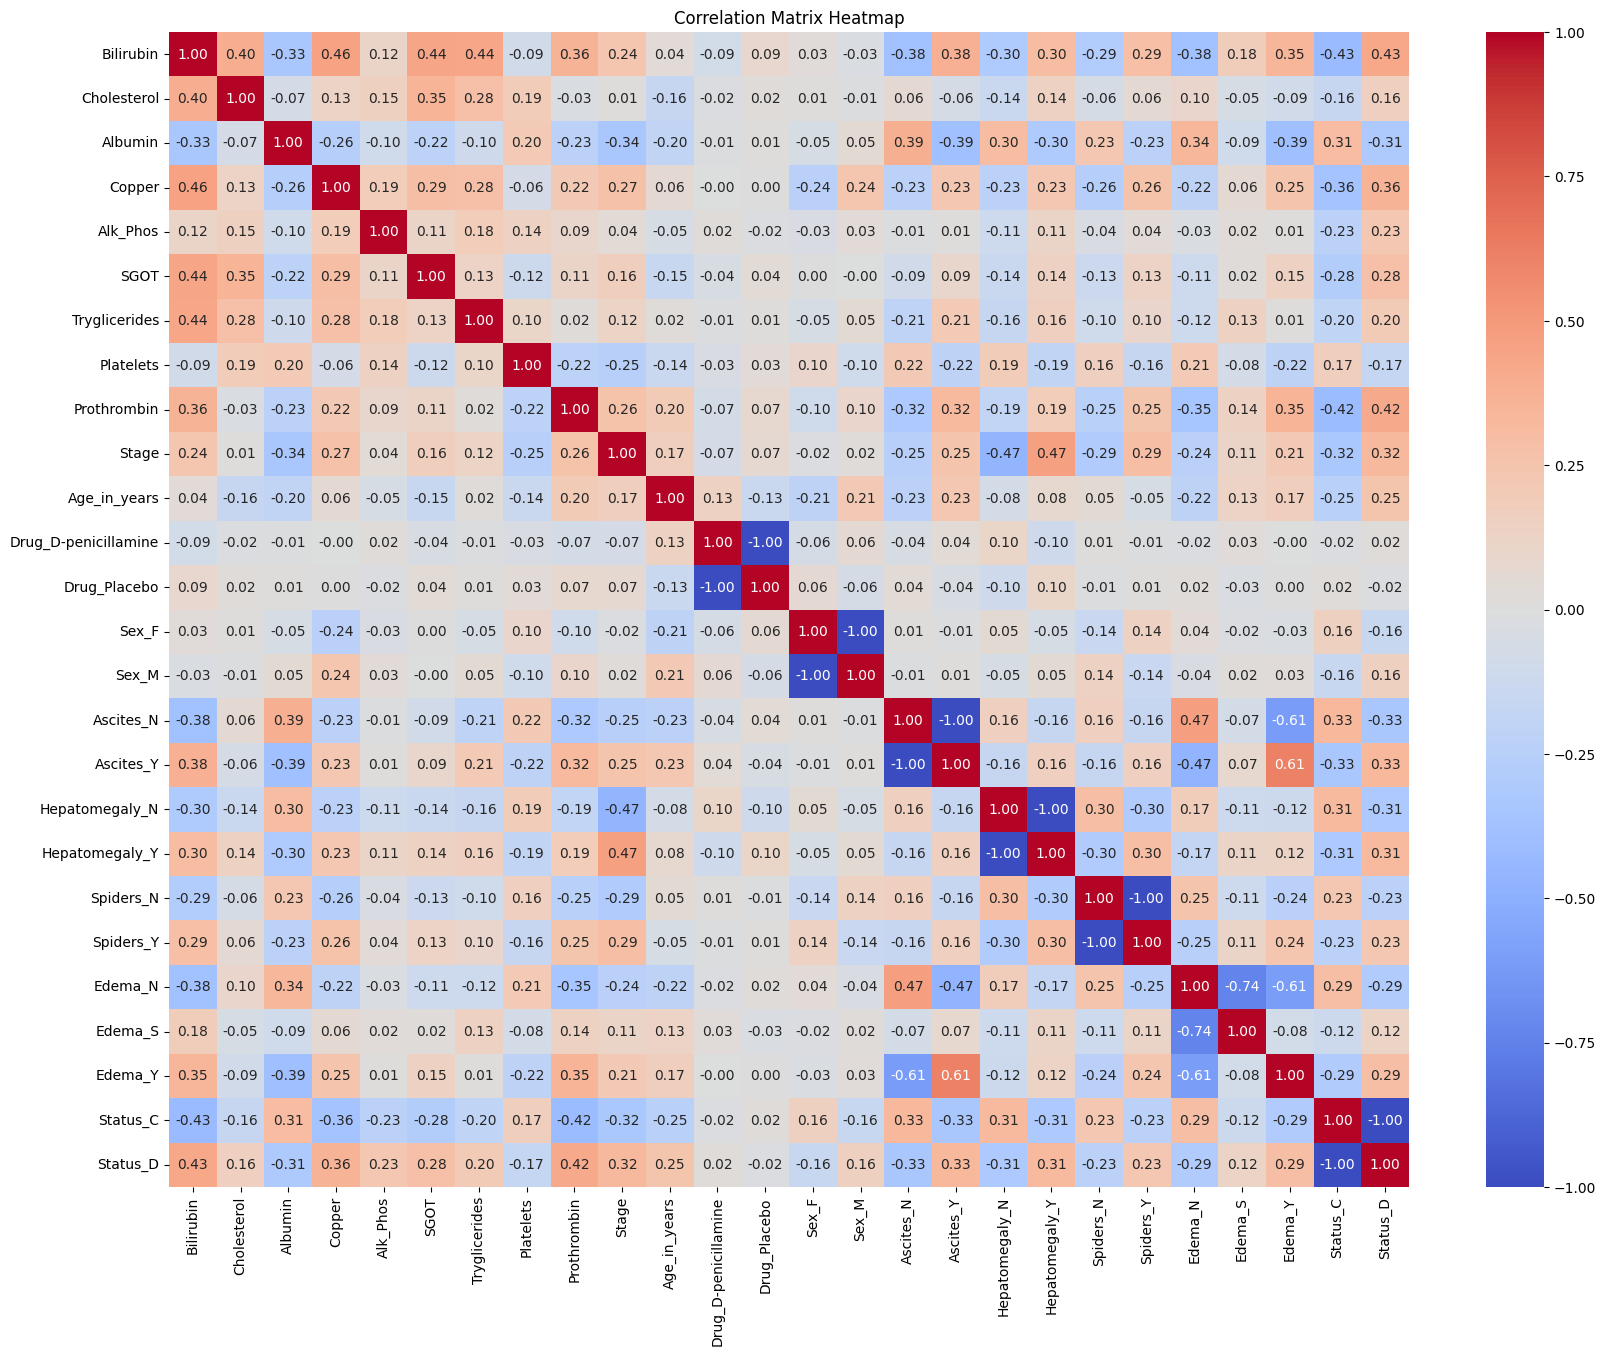

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_clean= pd.read_csv('Data/cleaned_data.csv')

categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)


correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Looking at the final 3 columns we can see that patients who had cirhosis died had the features of Bilirubin,Copper and Prothromibn. These elements wer present in thier blood cells hence it would allow us to predict thier survival rate

Visualisations

In [24]:
df=pd.read_csv('Data/cleaned_data.csv')
df

Drug Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0    D-penicillamine   F       Y            Y       Y     Y       14.5   
1    D-penicillamine   F       N            Y       Y     N        1.1   
2    D-penicillamine   M       N            N       N     S        1.4   
3    D-penicillamine   F       N            Y       Y     S        1.8   
4            Placebo   F       N            Y       Y     N        3.4   
..               ...  ..     ...          ...     ...   ...        ...   
307  D-penicillamine   F       N            Y       N     N        0.4   
308          Placebo   F       N            N       N     N        0.4   
309  D-penicillamine   F       N            N       N     N        1.7   
310  D-penicillamine   F       N            N       N     N        2.0   
311          Placebo   F       N            N       Y     N        6.4   

     Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0          261.0     2.60   156.0    1718.0  137.95          172.0      190.0   
1          302.0     4.14    54.0    7394.8  113.52           88.0      221.0   
2          176.0     3.48   210.0     516.0   96.10           55.0      151.0   
3          244.0     2.54    64.0    6121.8   60.63           92.0      183.0   
4          279.0     3.53   143.0     671.0  113.15           72.0      136.0   
..           ...      ...     ...       ...     ...            ...        ...   
307        246.0     3.58    24.0     797.0   91.00          113.0      288.0   
308        260.0     2.75    41.0    1166.0   70.00           82.0      231.0   
309        434.0     3.35    39.0    1713.0  171.00          100.0      234.0   
310        247.0     3.16    69.0    1050.0  117.00           88.0      335.0   
311        576.0     3.79   186.0    2115.0  136.00          149.0      200.0   

     Prothrombin  Stage Status  Age_in_years  
0           12.2    4.0      D     58.805479  
1           10.6    3.0      C     56.484932  
2           12.0    4.0      D     70.120548  
3           10.3    4.0      D     54.778082  
4           10.9    3.0      C     38.131507  
..           ...    ...    ...           ...  
307         10.4    2.0      C     61.224658  
308         10.8    2.0      C     58.339726  
309         10.2    2.0      C     62.375342  
310         10.5    2.0      C     38.024658  
311         10.8    2.0      C     33.175342  

[312 rows x 18 columns]

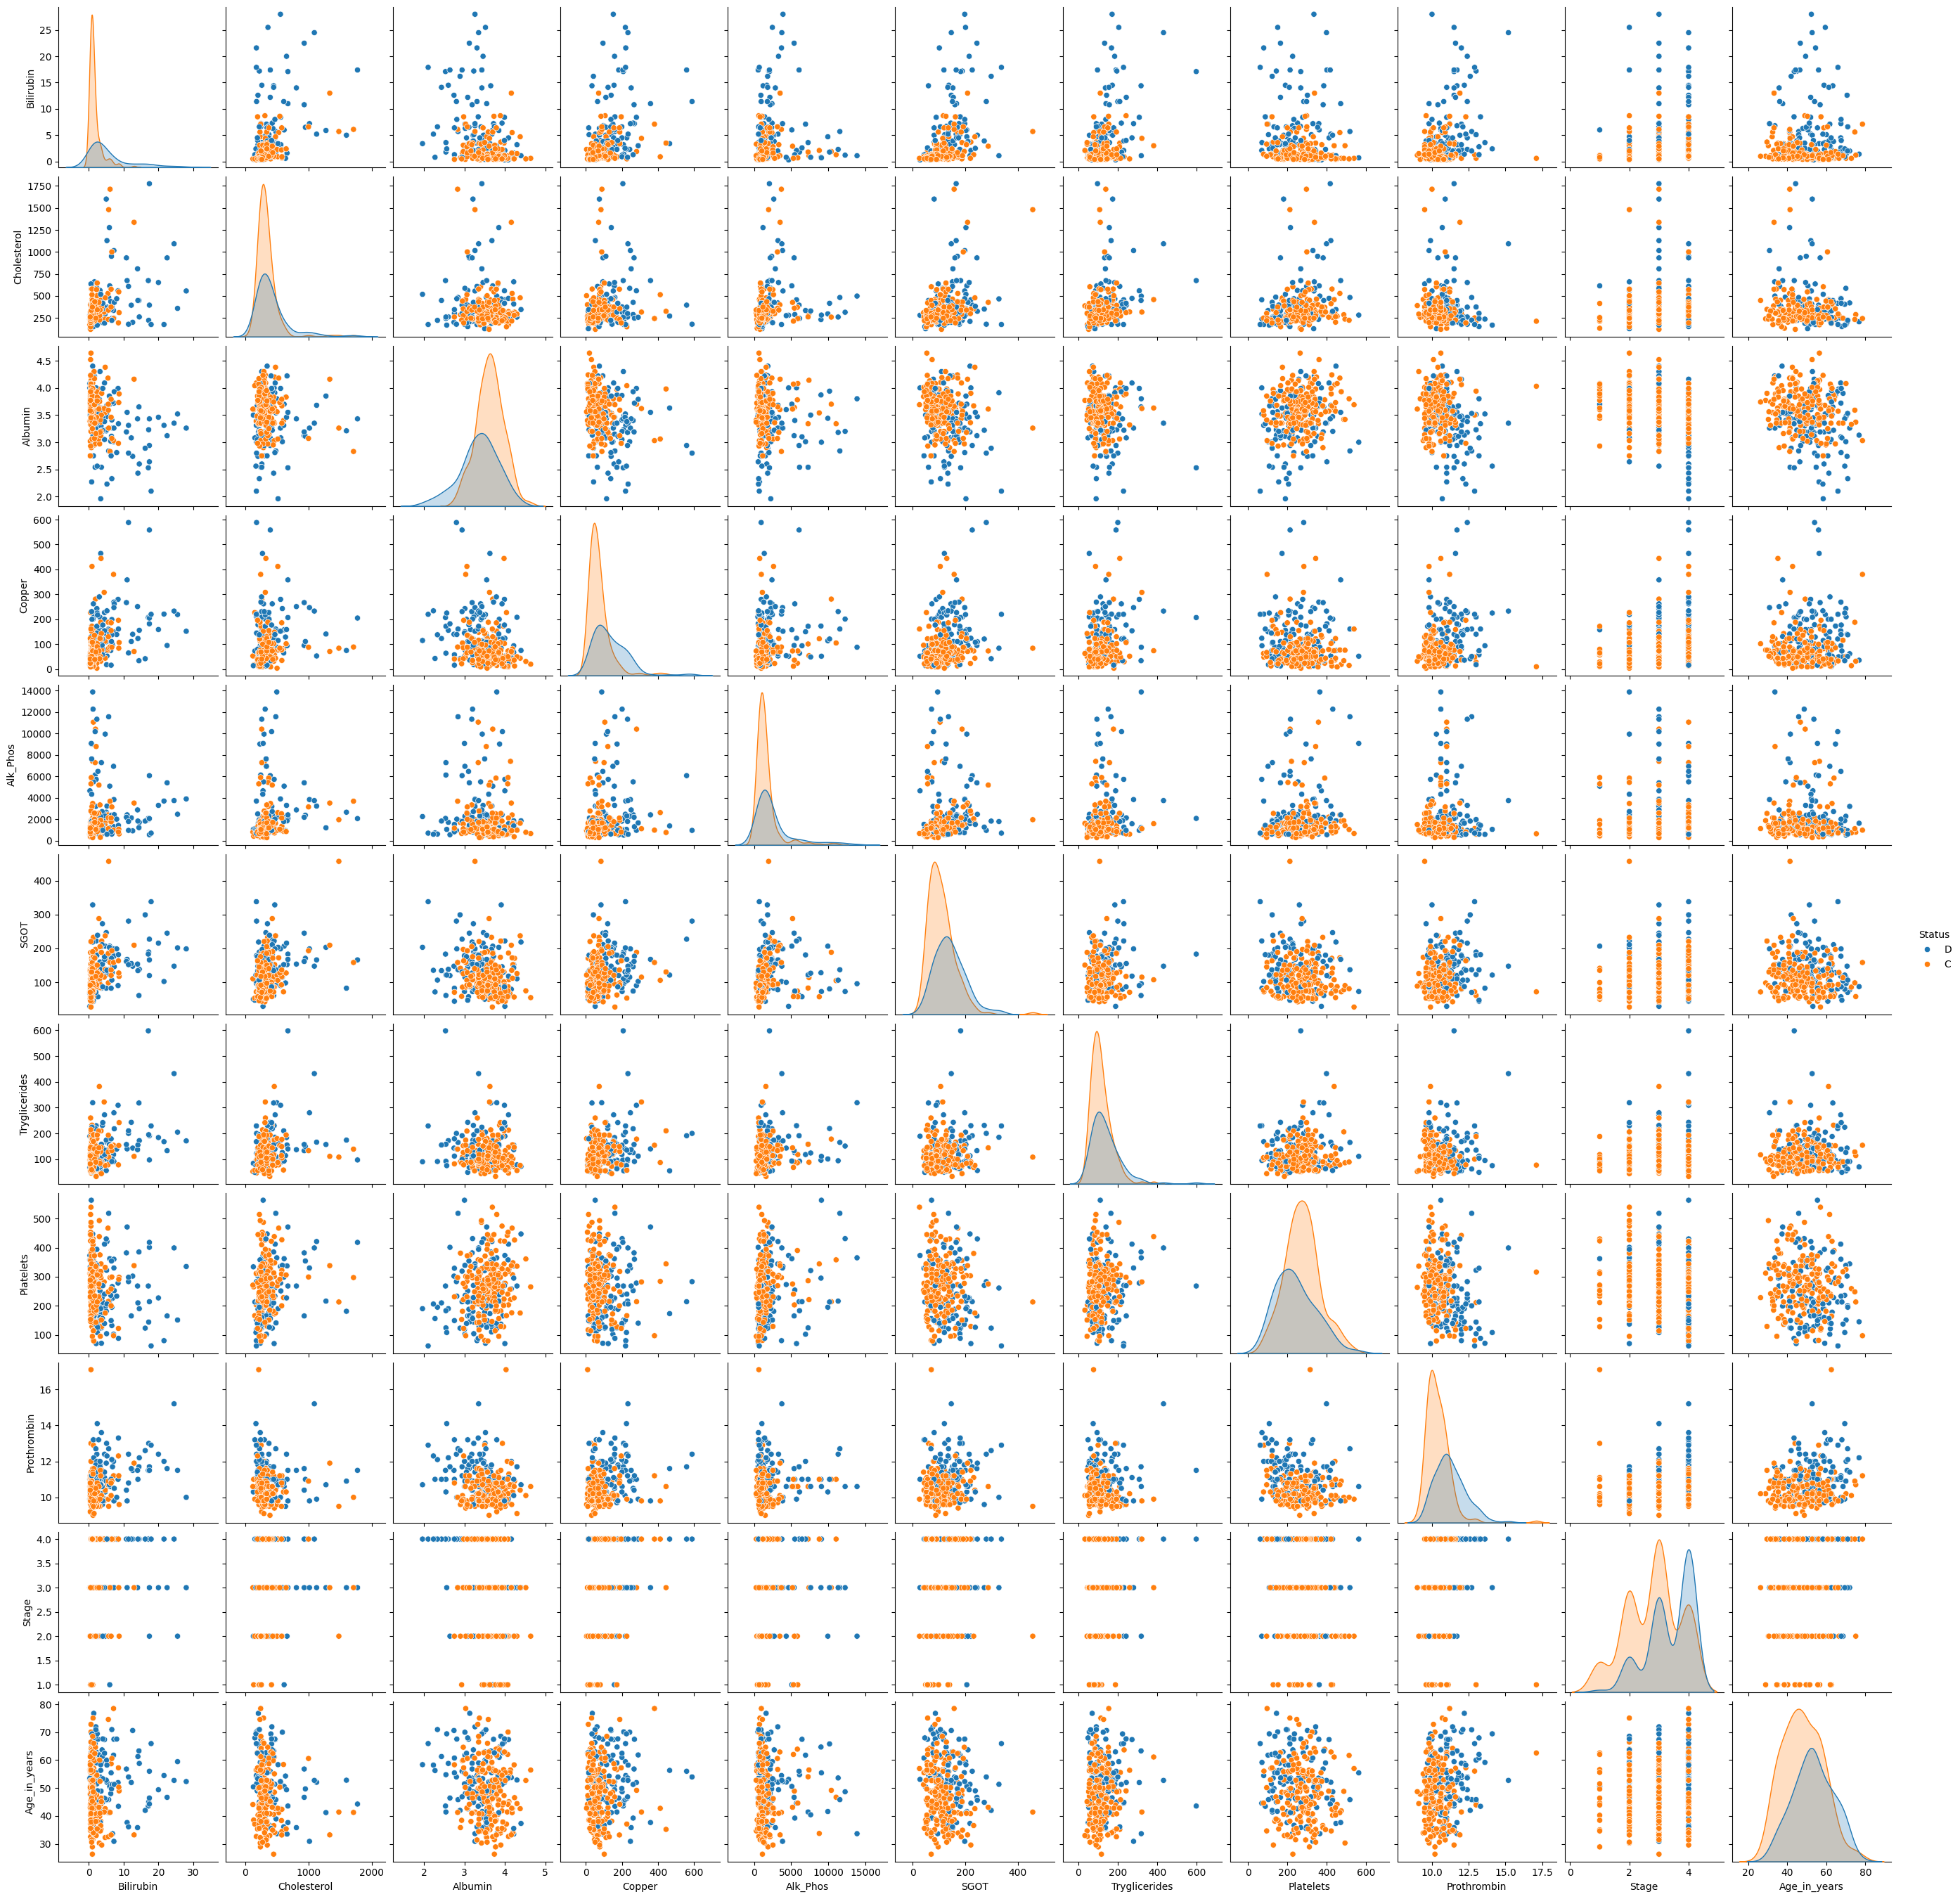

In [25]:
sns.pairplot(df, hue='Status')

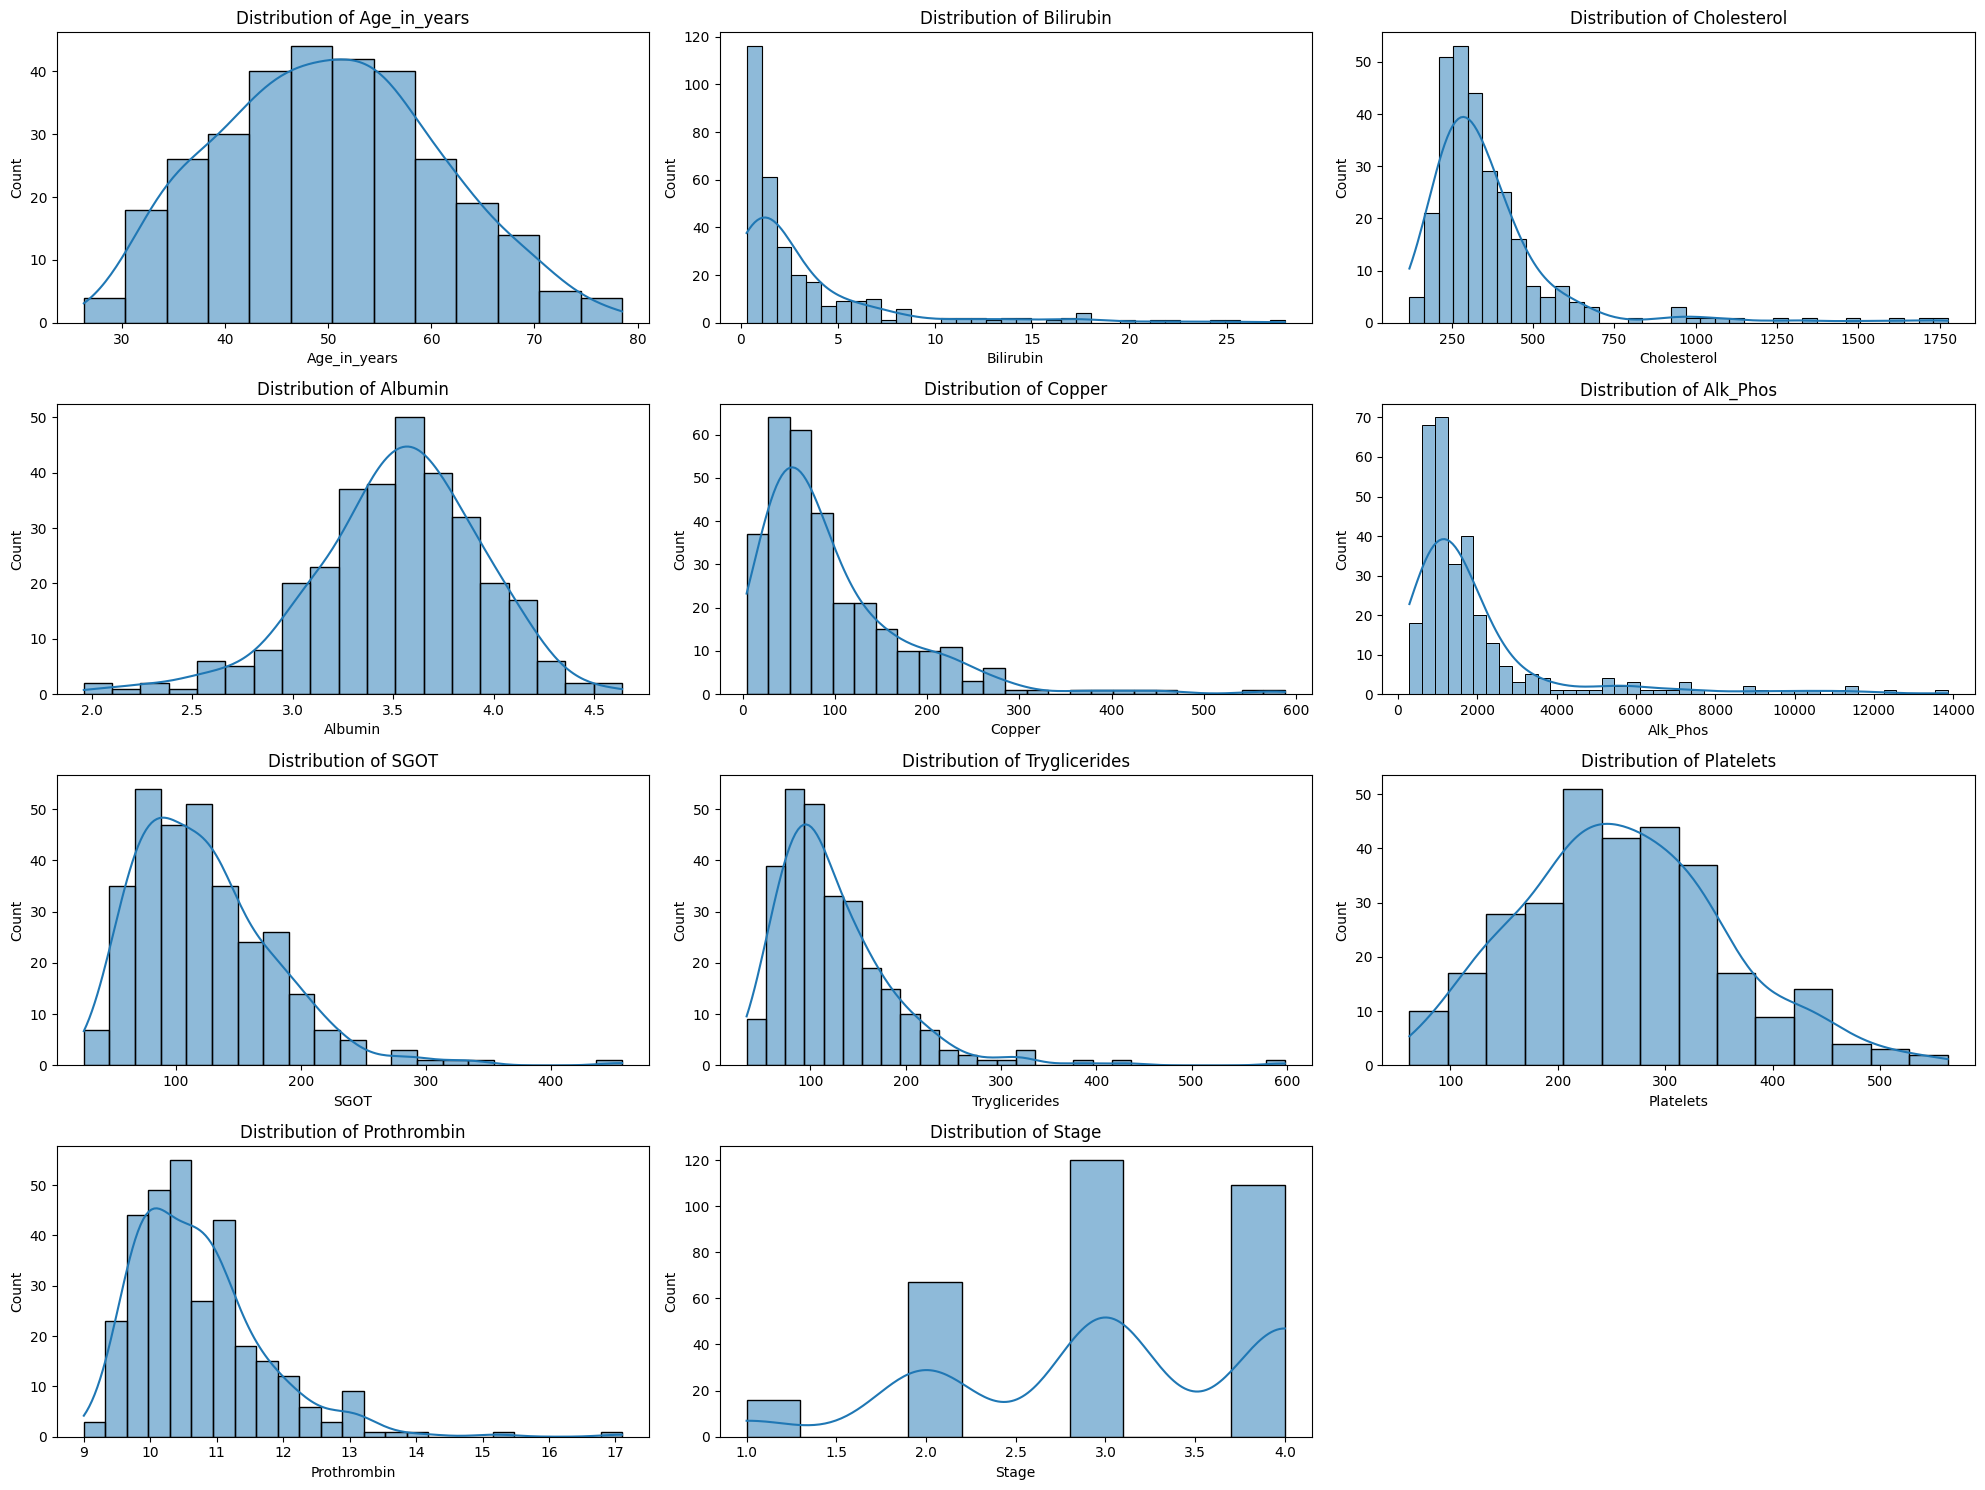

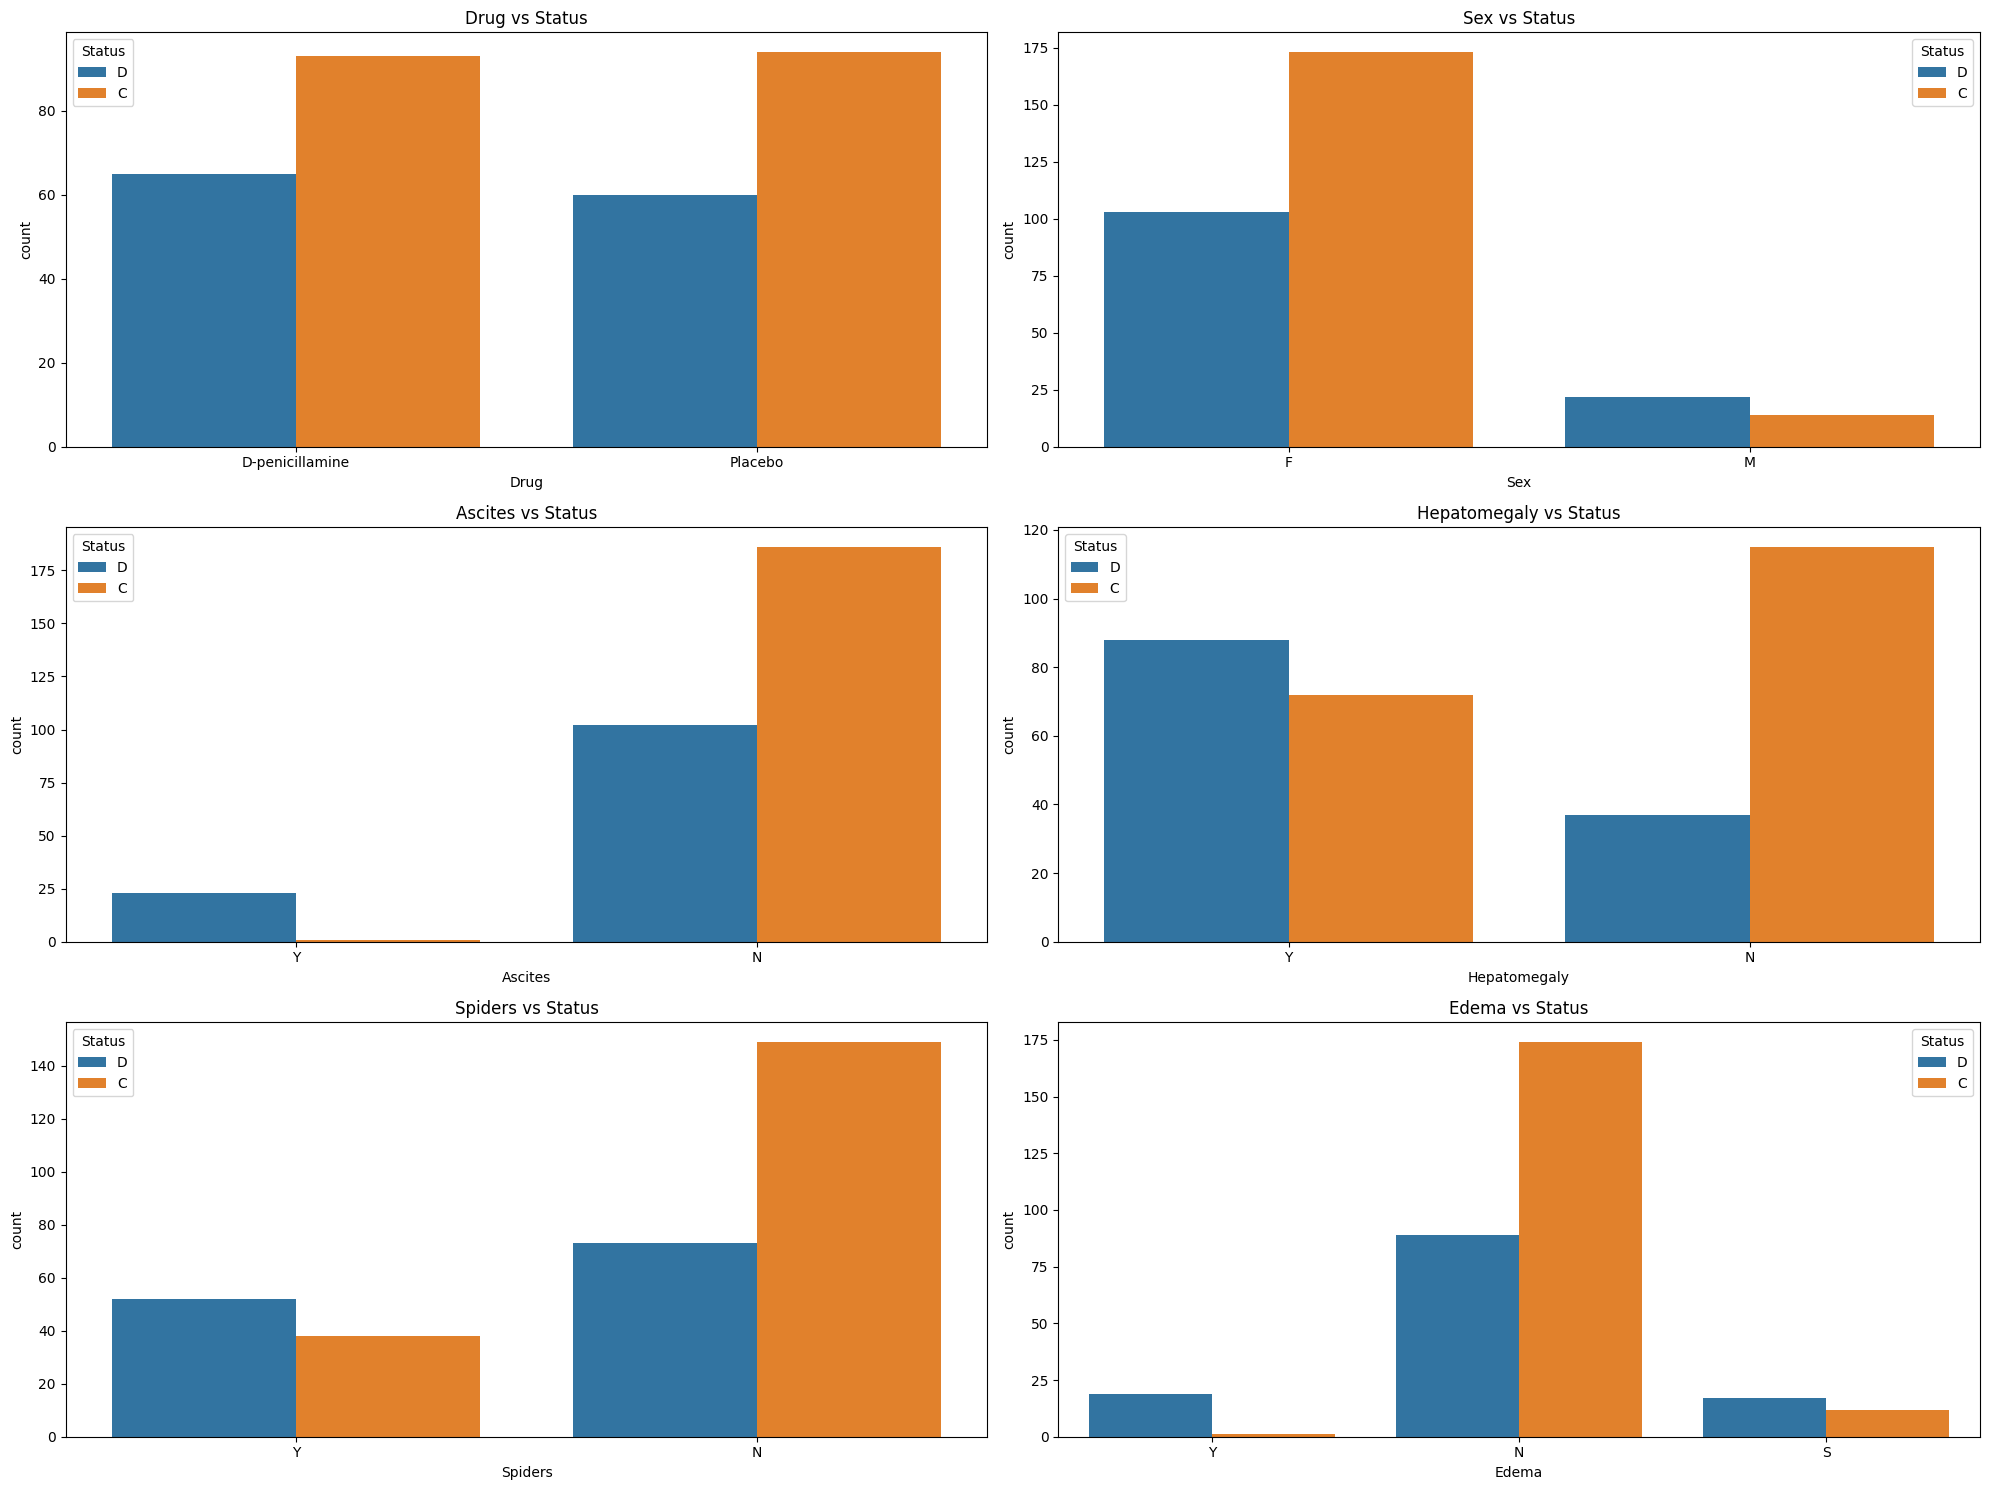

In [26]:
numerical_features = ['Age_in_years', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

categorical_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df_clean, x=feature, hue='Status')
    plt.title(f'{feature} vs Status')

plt.tight_layout()
plt.show()

Creating the model : Random forest classifier

Accuracy: 0.7936507936507936
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.76      0.73      0.75        26

    accuracy                           0.79        63
   macro avg       0.79      0.78      0.79        63
weighted avg       0.79      0.79      0.79        63



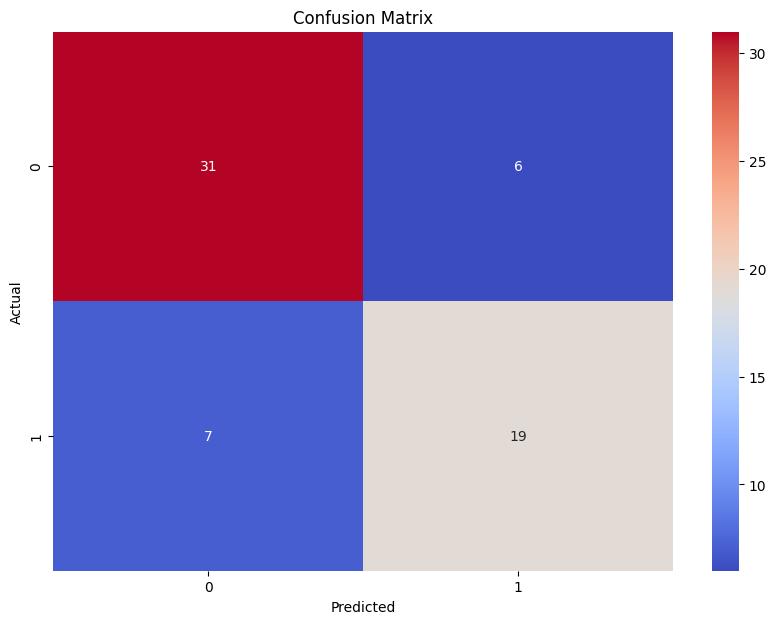

AUC Score: 0.8669438669438669


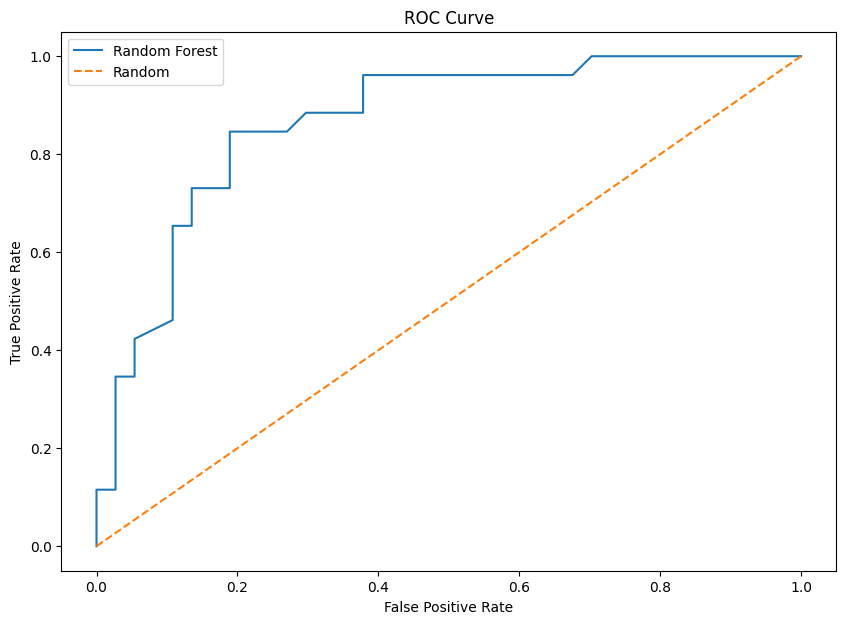

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_clean = pd.read_csv('Data/cleaned_data.csv')

df_clean = df_clean[['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#auc curve
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()



check feature importance

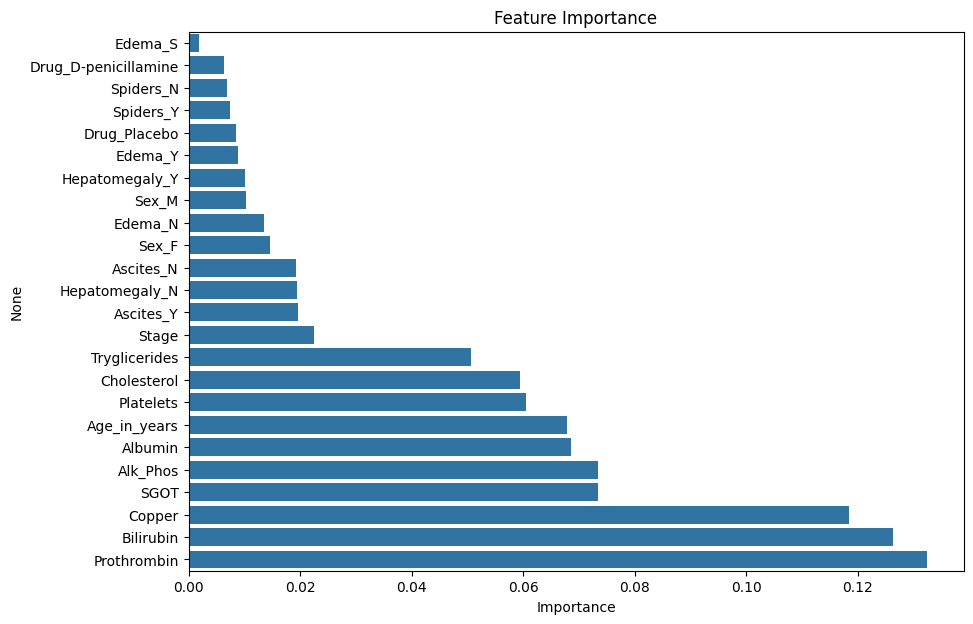

In [36]:
#feature importance
importance = rf.feature_importances_
sorted_idx = importance.argsort()
plt.figure(figsize=(10, 7))
sns.barplot(x=importance[sorted_idx], y=features.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')

plt.show()

we can remove the columns that are not important, this will help the model to learn better

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.75      0.69      0.72        26

    accuracy                           0.78        63
   macro avg       0.77      0.77      0.77        63
weighted avg       0.78      0.78      0.78        63



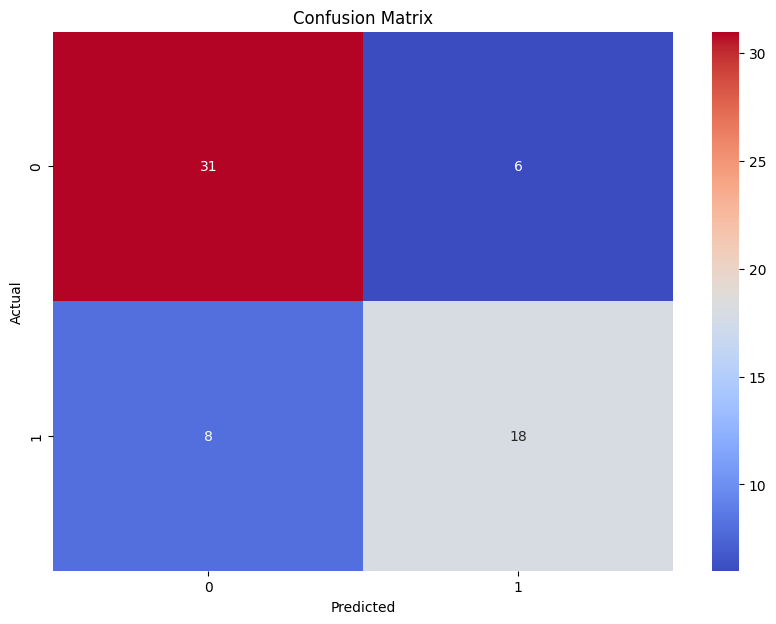

AUC Score: 0.8773388773388773


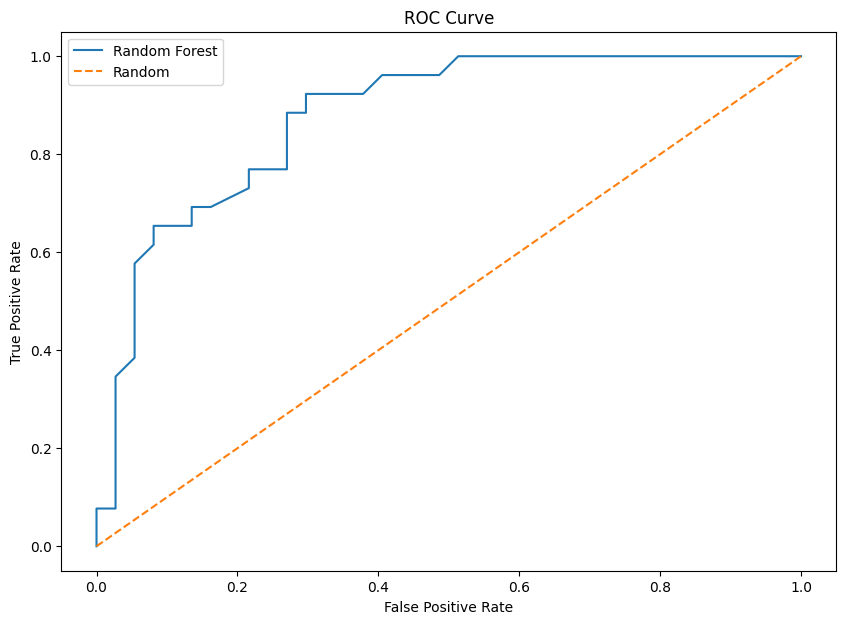

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_clean = pd.read_csv('Data/cleaned_data.csv')

df_clean = df_clean[['Sex', 'Ascites', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#auc curve
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()



tune hyper parameter

Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        73
           1       0.87      0.63      0.73        52

    accuracy                           0.81       125
   macro avg       0.83      0.78      0.79       125
weighted avg       0.82      0.81      0.80       125



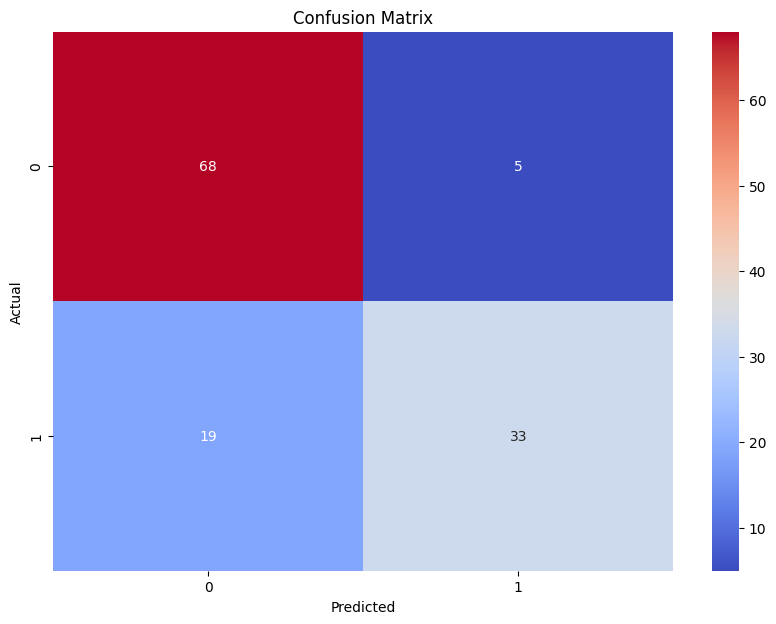

AUC Score: 0.864199157007376


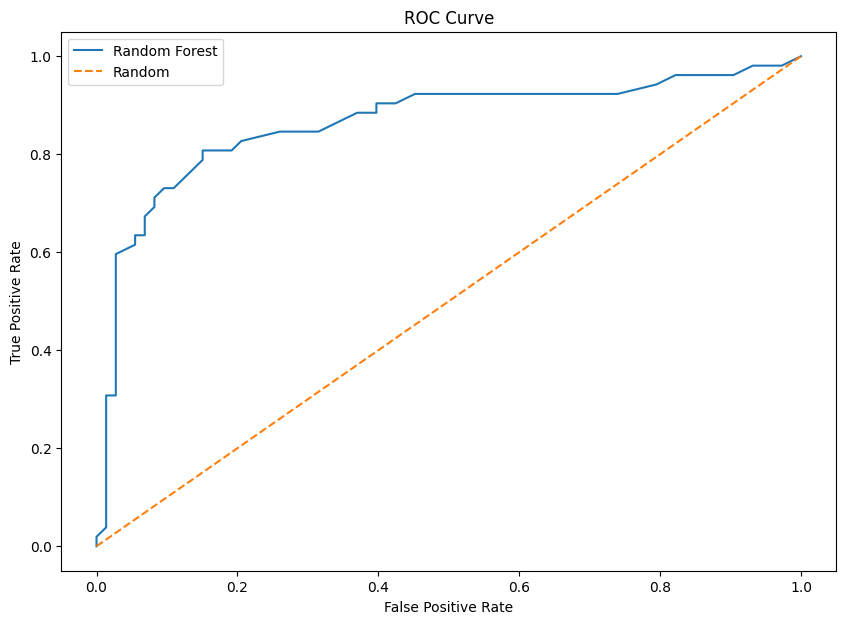

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_clean = pd.read_csv('Data/cleaned_data.csv')

df_clean = df_clean[['Sex', 'Ascites', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#auc curve
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()



change missing values imputing method

Accuracy: 0.792
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        73
           1       0.86      0.60      0.70        52

    accuracy                           0.79       125
   macro avg       0.81      0.76      0.77       125
weighted avg       0.80      0.79      0.78       125



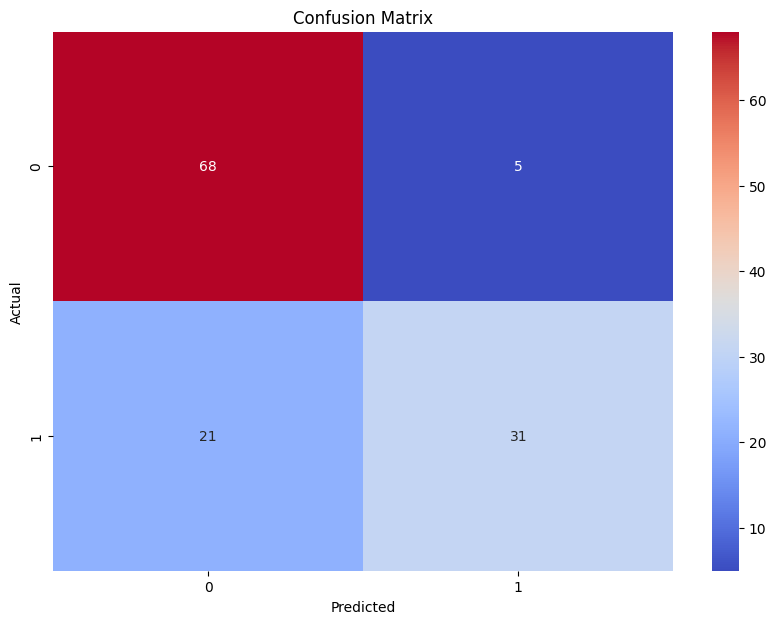

AUC Score: 0.8652528977871444


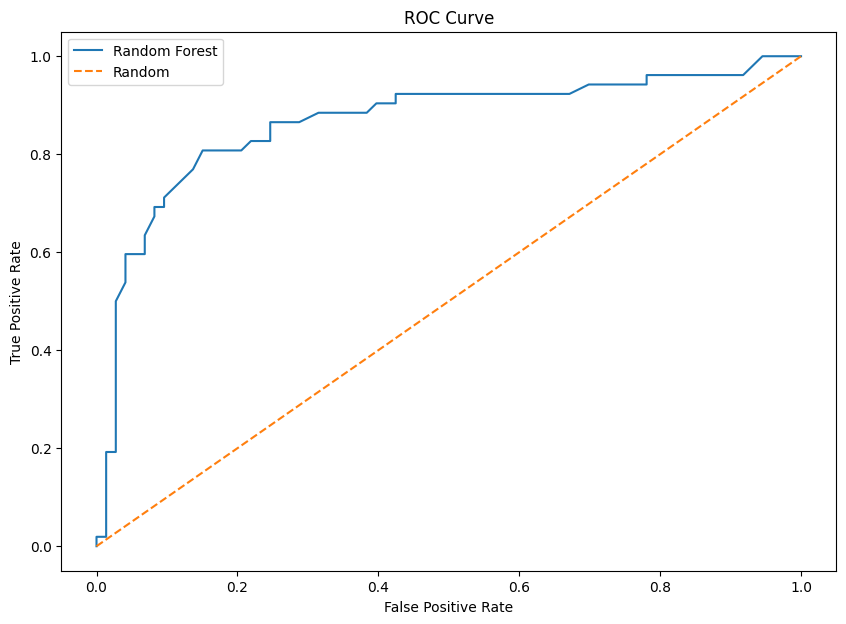

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_clean = pd.read_csv('Data/cleaned_data.csv')

df_clean = df_clean[['Sex', 'Ascites', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#auc curve
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()



Accuracy: 0.792
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        73
           1       0.86      0.60      0.70        52

    accuracy                           0.79       125
   macro avg       0.81      0.76      0.77       125
weighted avg       0.80      0.79      0.78       125



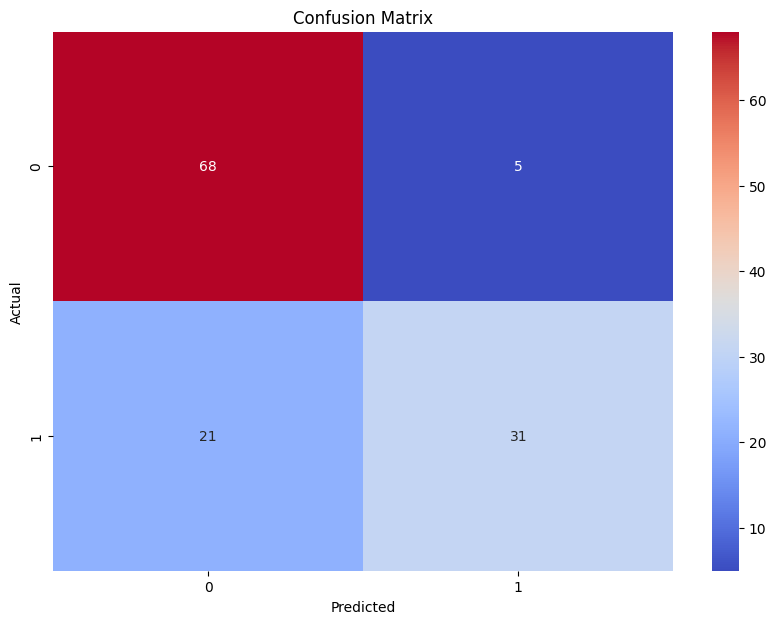

AUC Score: 0.8652528977871444


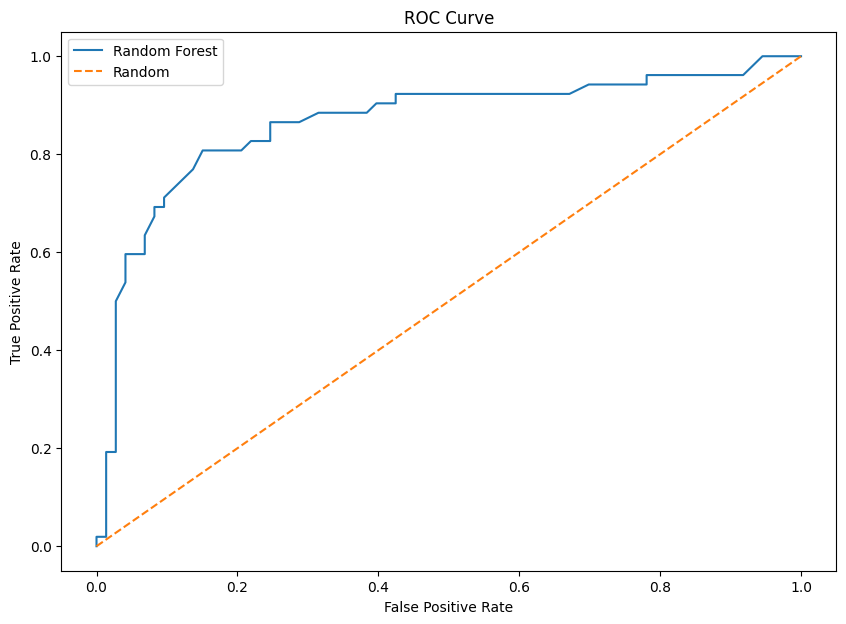

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

df_clean = pd.read_csv('Data/cleaned_data.csv')
df_clean = df_clean[['Sex', 'Ascites', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=10)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC curve
y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()


Hyperparameter tuning using grid search CV

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
232 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

Accuracy: 0.824
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        73
           1       0.88      0.67      0.76        52

    accuracy                           0.82       125
   macro avg       0.84      0.80      0.81       125
weighted avg       0.83      0.82      0.82       125



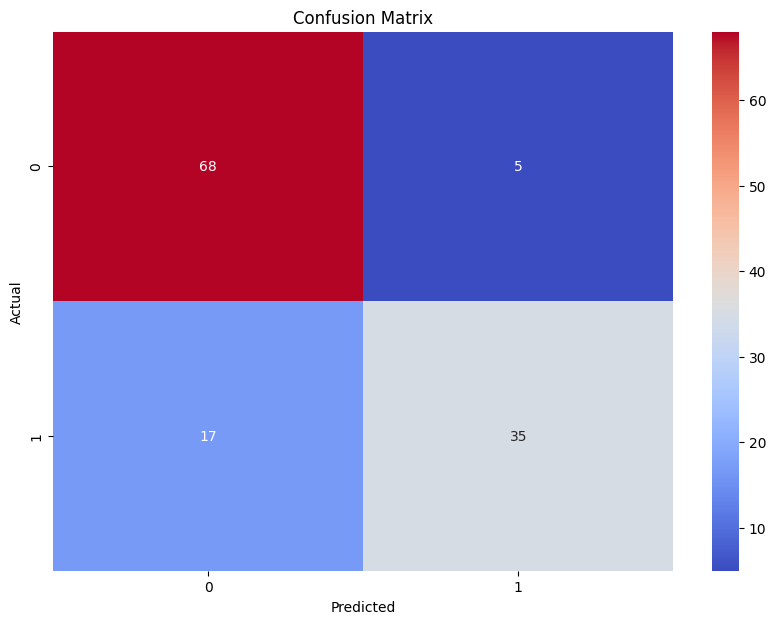

AUC Score: 0.8814541622760802


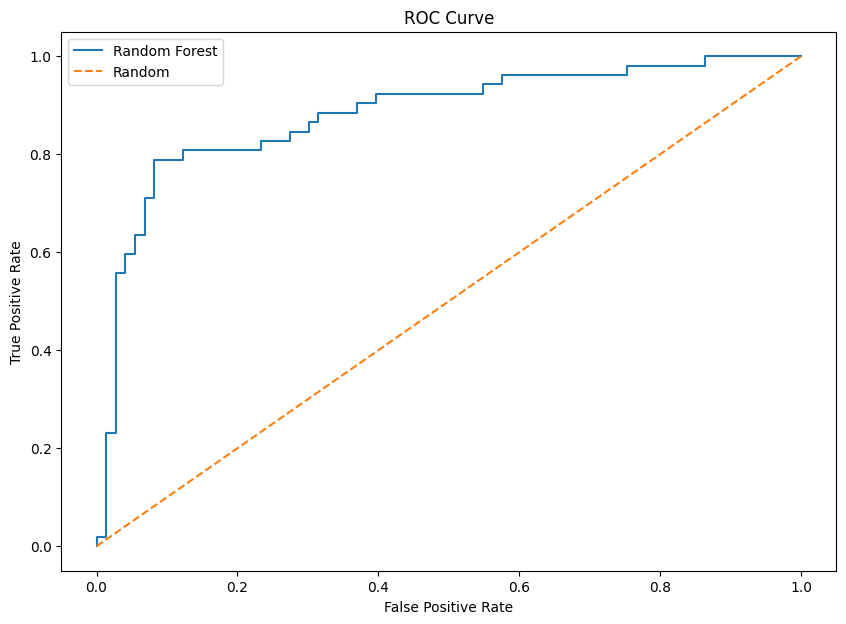

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_


selector = SelectFromModel(best_rf)
selector.fit(X_train_scaled, y_train)

X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

best_rf.fit(X_train_selected, y_train)
y_pred = best_rf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC curve
y_pred_proba = best_rf.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()


Accuracy: 0.776
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        73
           1       0.80      0.62      0.70        52

    accuracy                           0.78       125
   macro avg       0.78      0.75      0.76       125
weighted avg       0.78      0.78      0.77       125



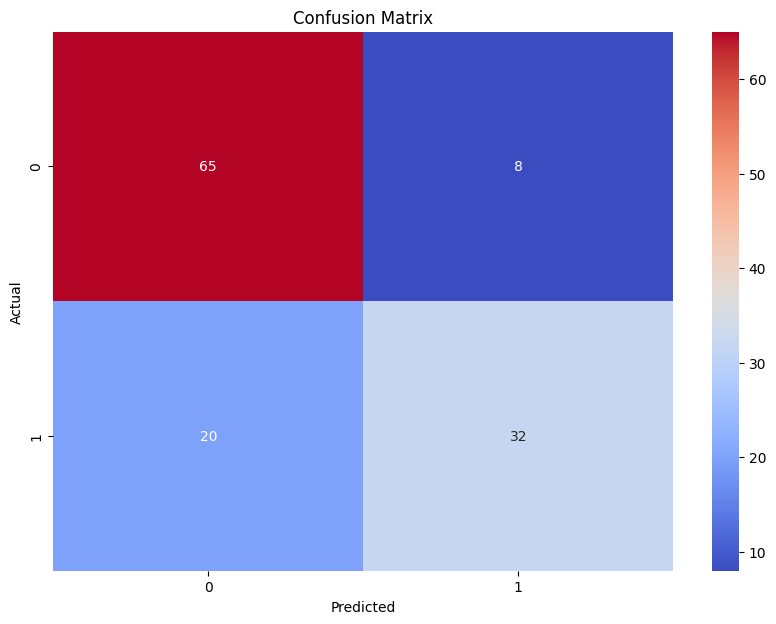

AUC Score: 0.8776343519494203


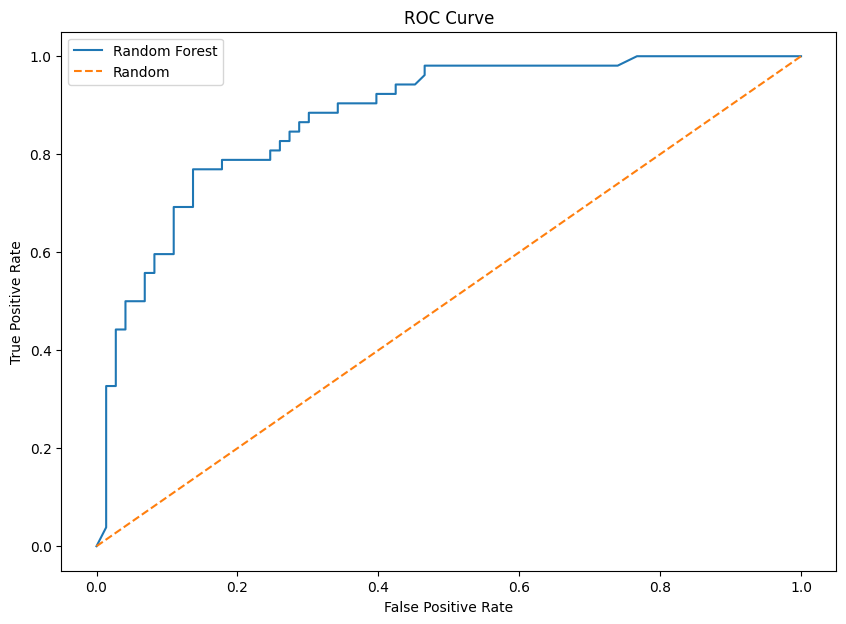

In [58]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

df_clean = pd.read_csv('Data/cleaned_data.csv')
df_clean = df_clean[['Sex', 'Ascites', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3,0.03]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_xgb_model = grid_search.best_estimator_

selector = SelectFromModel(best_xgb_model, threshold='median')
selector.fit(X_train_scaled, y_train)

X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

best_xgb_model.fit(X_train_selected, y_train)
y_pred = best_xgb_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC curve
y_pred_proba = best_xgb_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()



Accuracy: 0.768
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        73
           1       0.79      0.60      0.68        52

    accuracy                           0.77       125
   macro avg       0.78      0.74      0.75       125
weighted avg       0.77      0.77      0.76       125



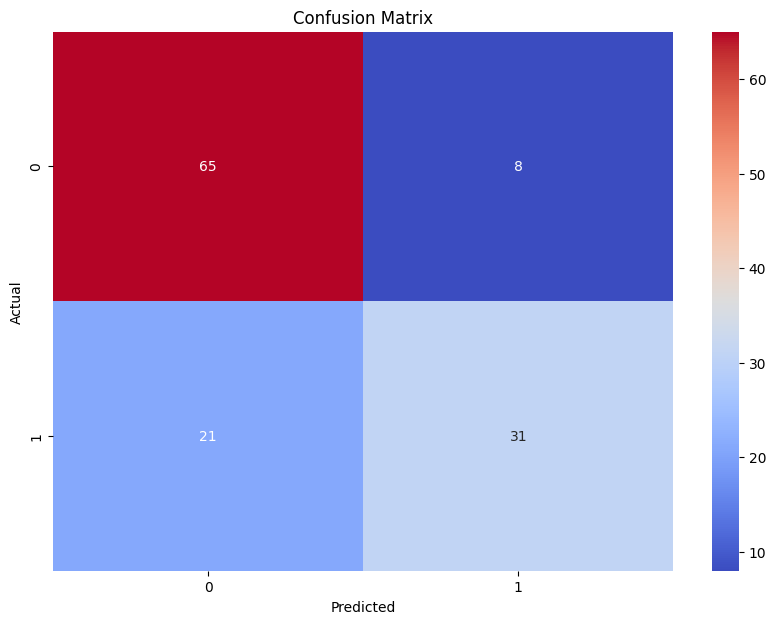

AUC Score: 0.8764488935721813


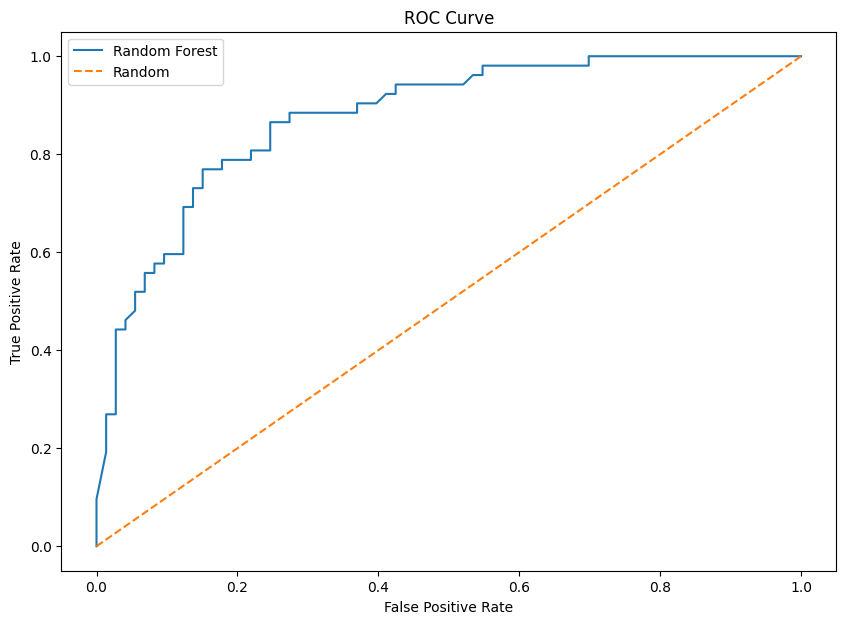

In [62]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

df_clean = pd.read_csv('Data/cleaned_data.csv')
df_clean = df_clean[['Sex', 'Ascites', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='most_frequent')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3,0.03]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_xgb_model = grid_search.best_estimator_

selector = SelectFromModel(best_xgb_model, threshold='median')
selector.fit(X_train_scaled, y_train)

X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

best_xgb_model.fit(X_train_selected, y_train)
y_pred = best_xgb_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC curve
y_pred_proba = best_xgb_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()



Testing adaptive boosting algorithm

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        73
           1       0.76      0.62      0.68        52

    accuracy                           0.76       125
   macro avg       0.76      0.74      0.74       125
weighted avg       0.76      0.76      0.75       125



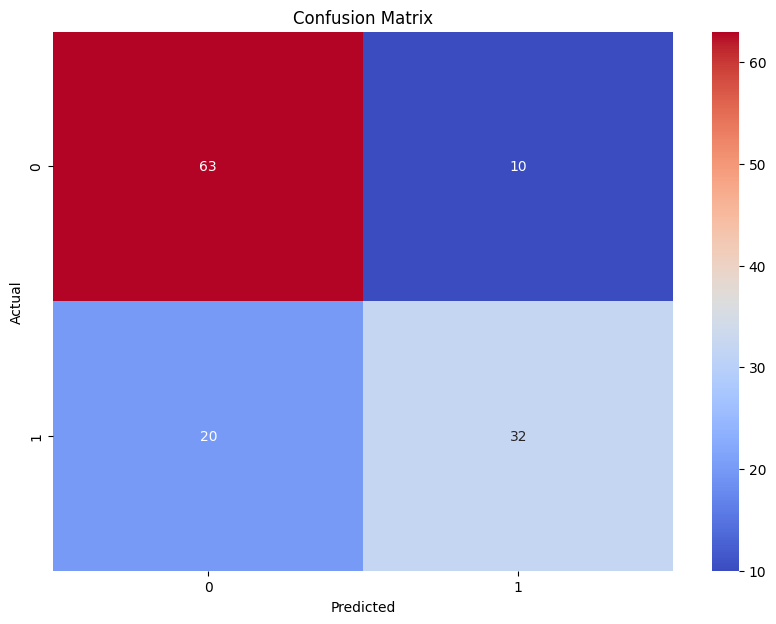

AUC Score: 0.8364067439409906


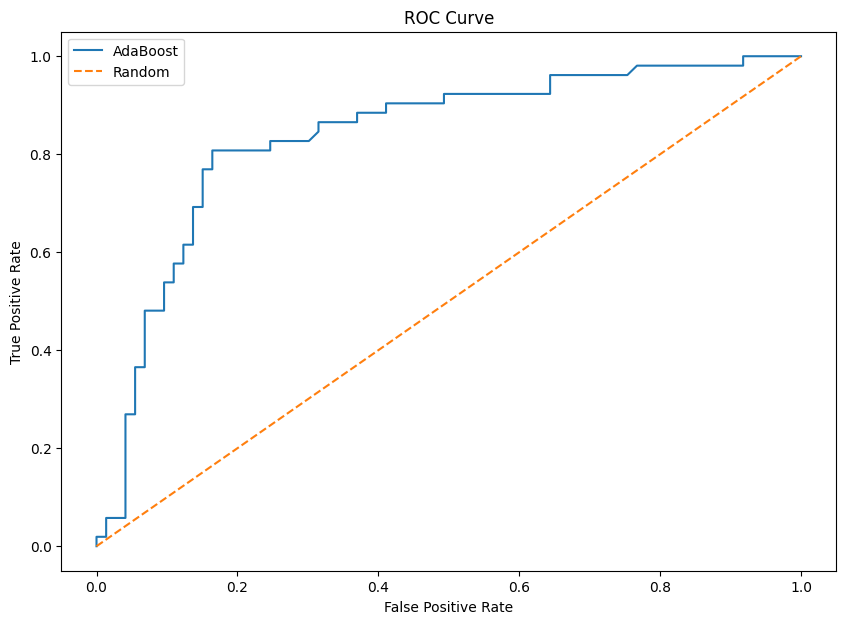

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

df_clean = pd.read_csv('Data/cleaned_data.csv')
df_clean = df_clean[['Sex', 'Ascites', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_in_years', 'Status']]

categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Edema']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

features = df_encoded.drop('Status', axis=1)
target = df_encoded['Status']

imputer = SimpleImputer(strategy='most_frequent')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ada_model = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3, 0.03]
}

grid_search = GridSearchCV(ada_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_ada_model = grid_search.best_estimator_

selector = SelectFromModel(best_ada_model, threshold='median')
selector.fit(X_train_scaled, y_train)

X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

best_ada_model.fit(X_train_selected, y_train)
y_pred = best_ada_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC curve
y_pred_proba = best_ada_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='AdaBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()


Using a support vector machine

Accuracy: 0.776
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        73
           1       0.77      0.65      0.71        52

    accuracy                           0.78       125
   macro avg       0.78      0.76      0.76       125
weighted avg       0.78      0.78      0.77       125



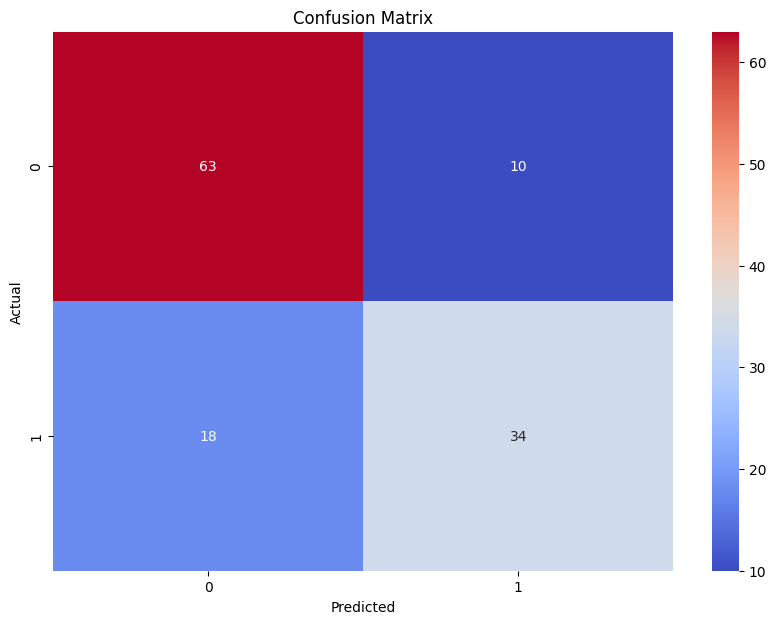

AUC Score: 0.8498419388830347


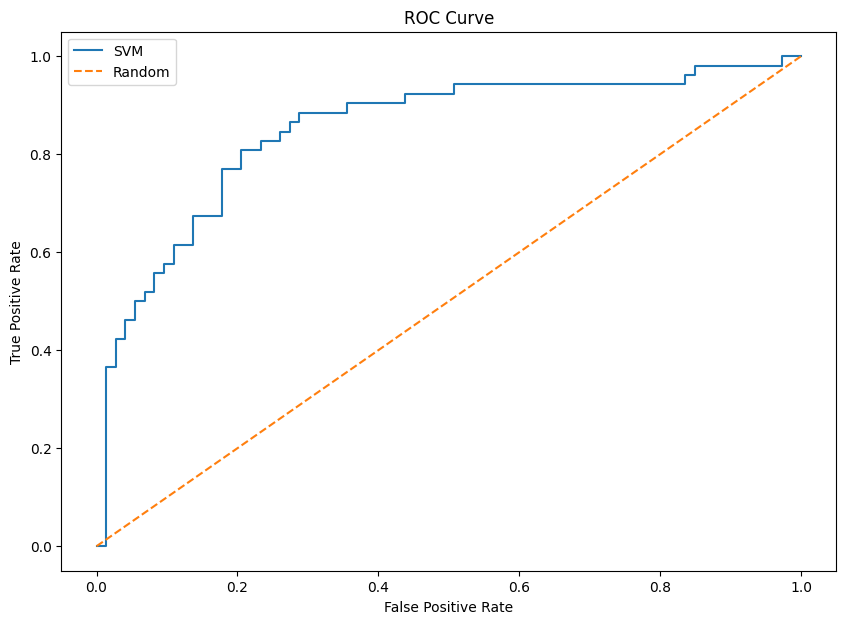

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


imputer = SimpleImputer(strategy='most_frequent')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_svm_model = grid_search.best_estimator_

best_svm_model.fit(X_train_scaled, y_train)
y_pred = best_svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC curve
y_pred_proba = best_svm_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='SVM')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

plt.legend()
plt.show()


Random forest algorithm has the highest accuracy of 0.75 and AUC score of 0.78. The model is able to predict the status of the patients with 75% accuracy. The model can be further improved by tuning the hyperparameters and feature selection. The model can be used to predict the status of the patients based on the given features.

